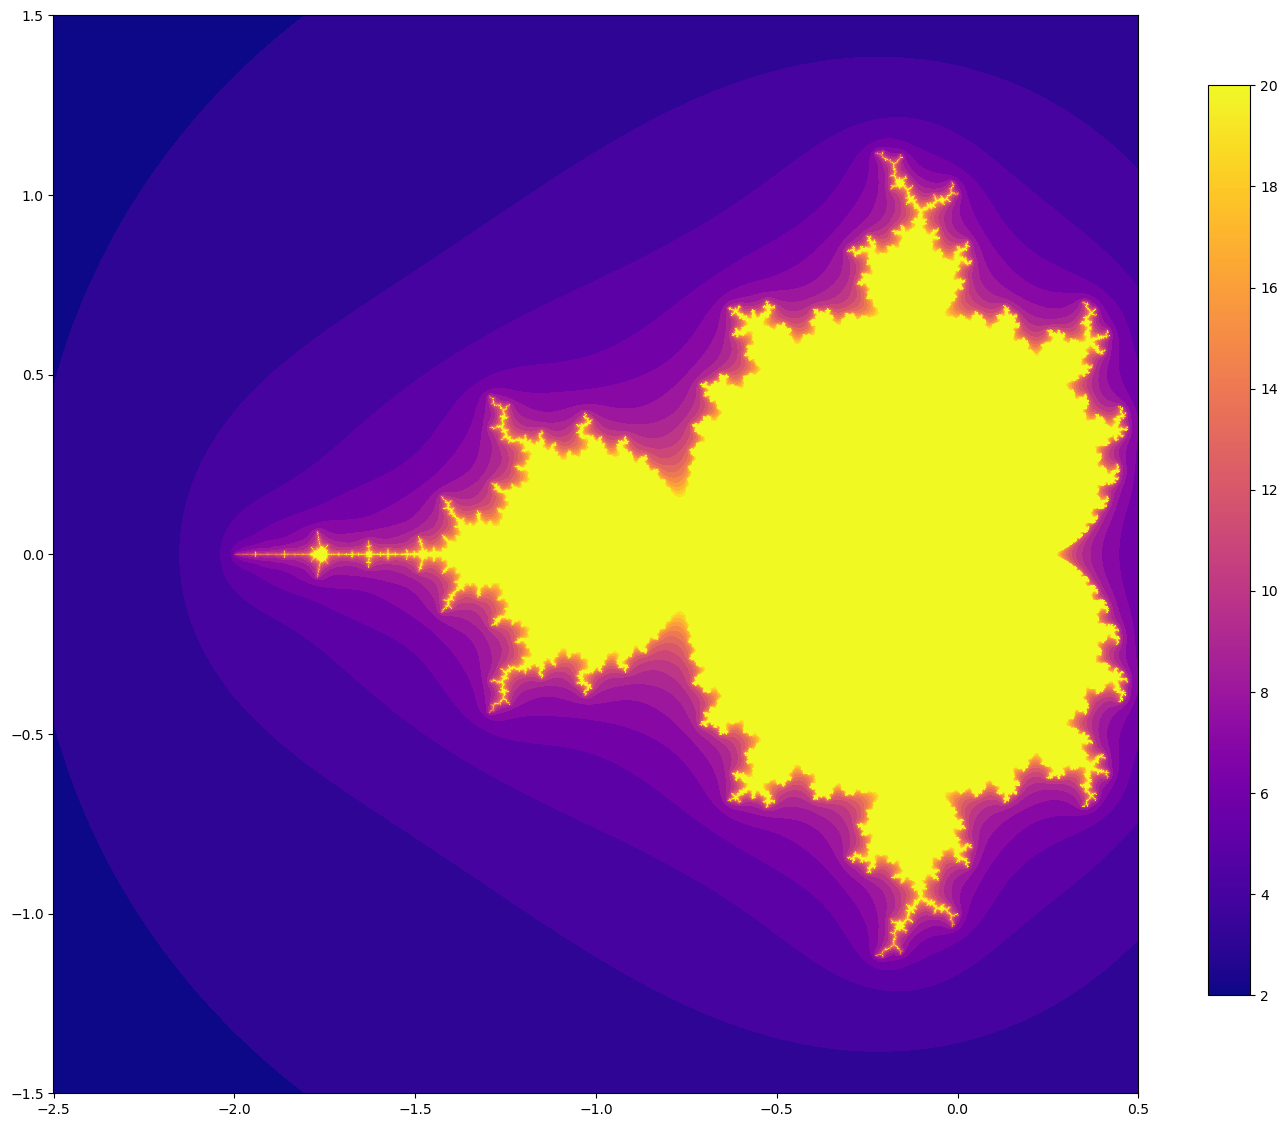

In [2]:
Z.shape

(6001, 6001)

In [3]:
Z[1500, 400:600]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

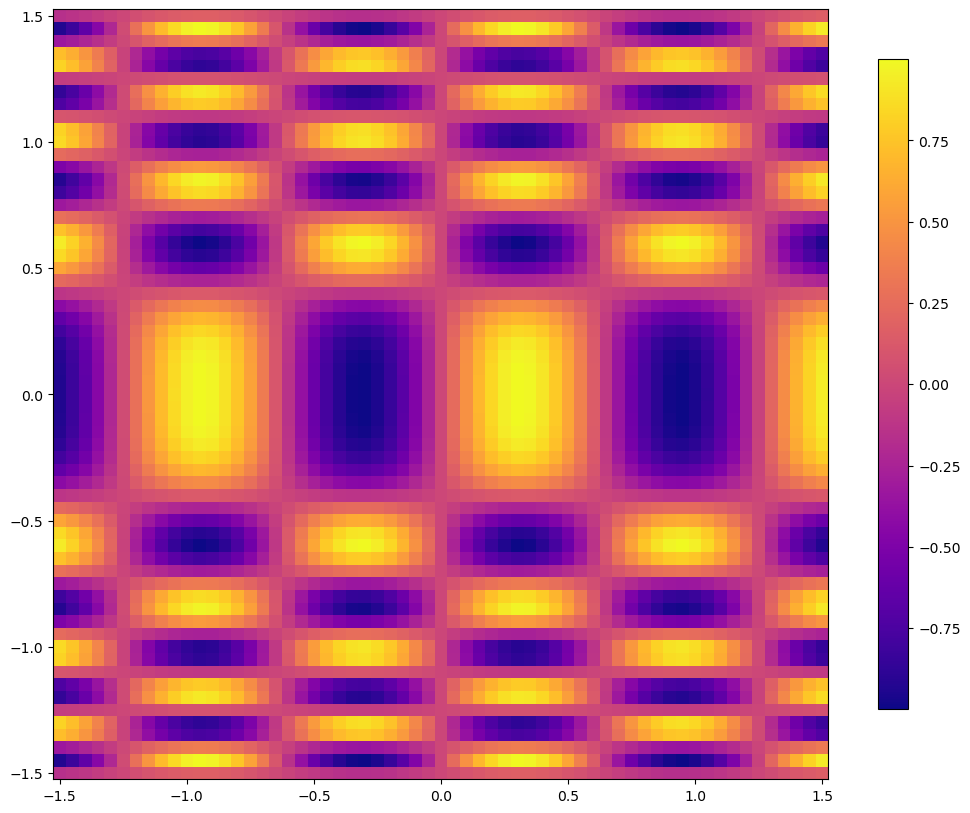

In [4]:
# framework for making colorized images of a function applied to a rectange of complex numbers
import numpy as np                                # numpy is 'numerical python', a useful library
import matplotlib.pyplot as plt                   # this is our plotting machinery
from math import sqrt, sin, cos                   # some basic math functions

def z(x, y):
    '''This function calculates a scalar value from a complex number (x, y)'''
    lambda_x, lambda_y = x, y                 # don't use this lambda; but it is important for the Mandelbrot set
    this_calc = sin(x*5)*cos((3*y)**2)        # here is where the answer is calculated
    return this_calc                          # return the answer

# The next line is rather mysterious. I do not understand it but it has the effect of taking the
# function above, z() and enabling it to run for all the values of (x, y) we care about. So it is
# doing the for-loops over the complex plane without any for-loops. Very convenient.
z2 = np.vectorize(z)

# epsilong controls how fine-grained our image is: It is the step size on the complex plane
epsilon = .05

# We use numpy's arange() method to produce 1D arrays x and y (real and imaginative coordinates).
# They will run -1.5, -1.4, ..., 1.4, 1.5 if epsilon is 0.1. This results in a very coarse image.
# To make the image more detailed: Make epsilon smaller; but the render time will increase.
x = np.arange(-1.5, 1.5 + epsilon, epsilon)
y = np.arange(-1.5, 1.5 + epsilon, epsilon)

# Here X and Y together form a numpy "meshgrid" which is just an expansion of both x and y to
# give the coordinates of every point in the region. That's fed into that z2() function above.
# For more: https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy
X, Y = np.meshgrid(x, y)

# Now we calculate a 2D numpy array (technically the variable type is 'ndarray' for n-dimensional array)
# that will be the basis of our figure. Again it uses z2() to run z() on every point in the array.
Z = z2(X, Y)

# At last our figure exists as a blank canvas
fig, ax = plt.subplots(figsize=(10,10))

# Look up matplotlib colortable list for some alternatives if you like
my_cmap = 'plasma'

# This draws the image of the data. The first argument is a list of x coordinates, the second is 
# the y coordinates, the third is the Z value at each location, and cmap is short for color map.
# That colormap is applied to Z. But notice that colors are assigned automatically; no work by us.
im=ax.pcolormesh(x, y, Z, cmap=my_cmap)

# I am putting a "colorbar" next to the figure for reference
cax = fig.add_axes([.95, 0.18, .03, .65])

# This colorbar shows us the range of values in our Z data.
fig.colorbar(im, cax=cax, orientation='vertical')

# Without further ado, what did we get?
plt.show()

In [5]:
Z.shape

(61, 61)

# Logistics Map

Starting with the idea of a recursion parameter r and a population component (x)*(1-x) with x on [0, 1]:
Provide a seed value for x, recurse the function through some number of iterations/generations, see 
where this winds up. Then increment r and do this again, through a range of r values. 


There are three interesting results, just to begin with. First for particular ranges of r the recursion
settles down to one... or two... or four... or eight... stable terms. i.e. further iterations cycle 
between stable values. Second: Beyond this, for larger r, there is no stability; just chaos. And 
third, other functions can be substituted for x in the expression r x (1 - x).


There is more to observe as well. Just to begin with:
The alignment of orbital (stable multi-value) regions; the voids that
appear in the chaotic regions; associated orbitals *there*; dense arcuate paths through the chaos; precise
locations of bifurcation points; slow convergence 'after' bifurcation points (leaving dust); various
artifacts for example created by using a constant seed value; other pathological/dusty artifacts 
outside the orderly part of the chart; and of course (Izzie remarks) the asymmetry of the 
bifurcation structure.


As an idea for subsequent work: One could create an animation through a gradation of polynomial coefficients
showing how they impact the Logistics Map structure.


Also available: Information could be encoded as a corresponding list of colors.


Also: Use axis range parameters to zoom in on particular regions. Perhaps return `fig, ax` to this end.




In [6]:
# Logistics Map charting function defined
import numpy as np
from matplotlib import pyplot as plt
from random import randint, random
from math import sin, cos, log
from numpy import arctanh

def LM(p, f):
    '''
    p[] is a list of control parameters as follows: 
      r0, r1, dr define the range and increment of the recursion parameter r
      lo/hiLim define a 'fall out of recursion' condition: x has 'escaped'
      aRan, bRan define the seed range: aRan + bRan * random(0 -- 1)
      aIts, bIts define a base plus smaller random number of iterations
        When the recursion reaches a cycling point: Choose a random one of 
        these to plot so they are eventually all shown on the chart.
      s and c are the respective size and color of the markers
      wid and hgt are the dimensions of the chart
    f is a function to use as the recursion basis.
        This is coordinated with choice of r0, r1, dr to focus on an ROI.
        The function can be an existing one like sine or it can be defined
          in the cell.
    '''
    r0, r1, dr, loLim, hiLim, aRan, bRan = p[0], p[1], p[2], p[3], p[4], p[5], p[6]
    aIts, bIts, s, c, wid, hgt           = p[7], p[8], p[9], p[10], p[11], p[12]
    rd, xd = [], []
    for r in np.arange(r0, r1, dr):
        n, x0 = aIts + randint(1, bIts), aRan + bRan * random()
        for i in range(n):
            xp = r * f(x0) * (1 - f(x0))
            if xp < loLim or xp > hiLim: break
            x0 = xp
        rd.append(r); xd.append(x0)
    fig, ax = plt.subplots(figsize=(wid, hgt)); ax.scatter(rd, xd, s=s, c=c)

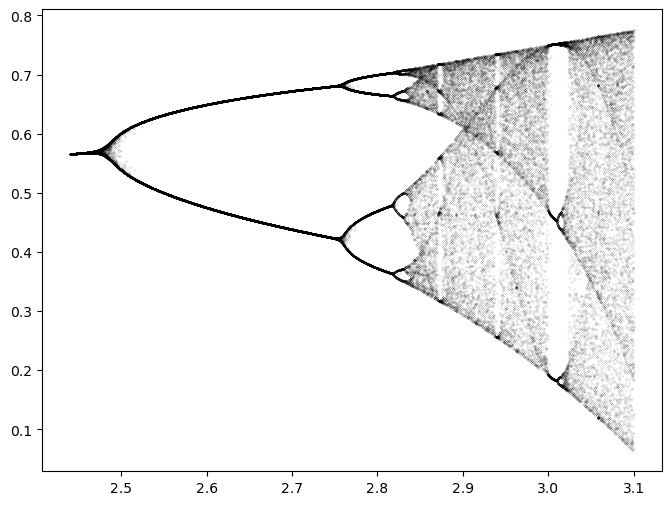

In [7]:
from math import tan
LM([2.44, 3.1, .00001, 0, .8, 0.10, 0.62, 100, 16, .005, 'k', 8, 6], tan)

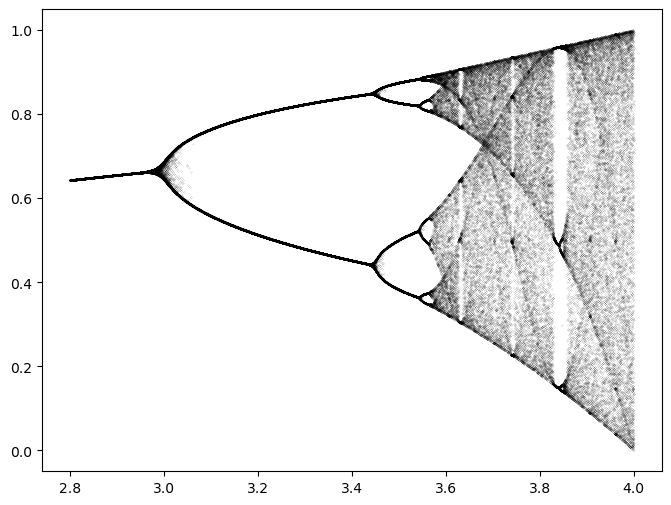

In [8]:
def X(x): return x
LM([2.8, 4.0, .00001, 0, 4, 0.1, 0.8, 100, 16, .005, 'k', 8, 6], X)

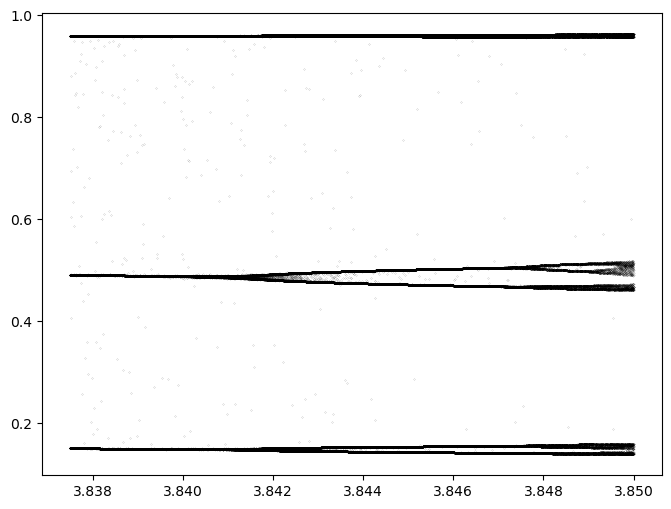

In [9]:
def X(x): return x
LM([3.8375, 3.85, .0000001, -10, 10, 0.1, 0.8, 100, 16, .005, 'k', 8, 6], X)

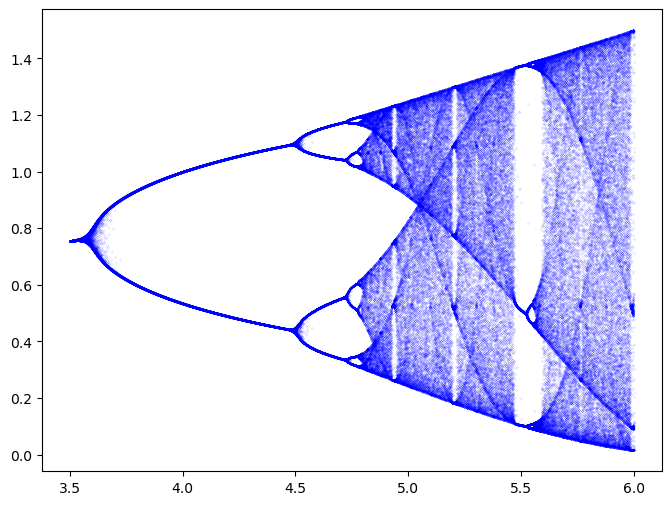

In [10]:
# sine
LM([3.5, 6., .00001, 0, 4, 0.1, 0.8, 100, 16, .005, 'b', 8, 6], sin)

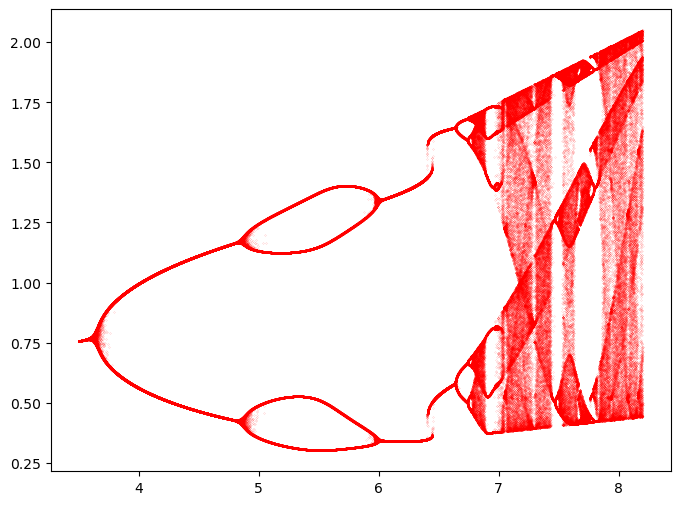

In [11]:
# sine: polynomial, 2 terms
def sinePoly2(x): return x - x**3/6
LM([3.5, 8.2, .00001, 0, 4, 0.1, 0.8, 100, 16, .005, 'red', 8, 6], sinePoly2)

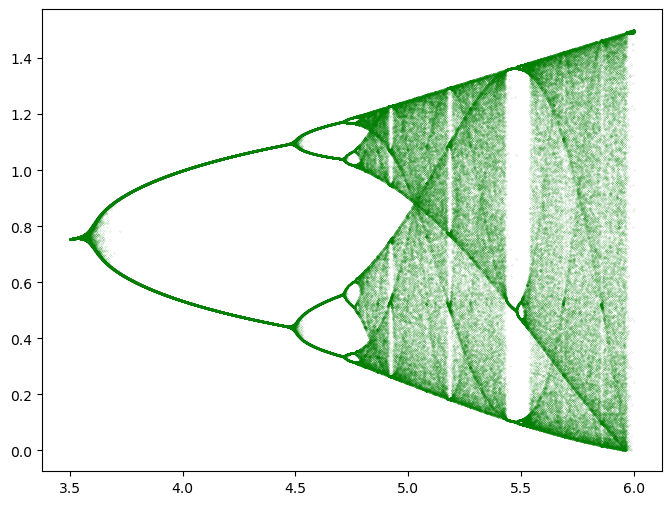

In [12]:
# sine: polynomial, 3 terms
def sinePoly3(x): return x - x**3/6 + x**5/120

LM([3.5, 6., .00001, 0, 4, 0.1, 0.8, 100, 16, .005, 'green', 8, 6], sinePoly3)

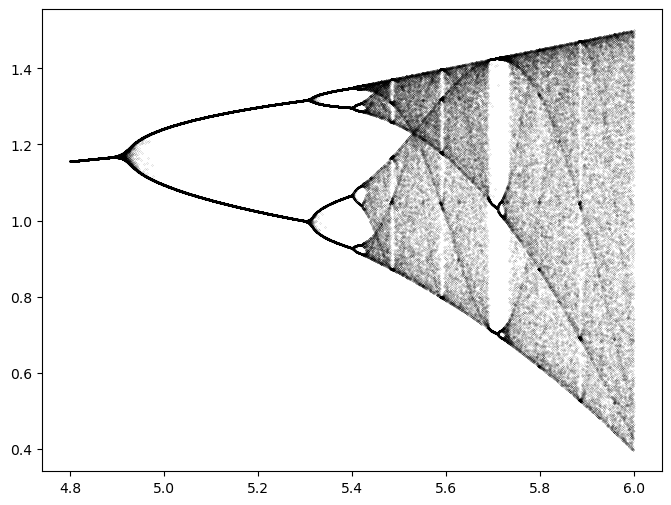

In [14]:
# cosine
LM([4.8, 6.0, .00001, 0, 4, 0.5, 0.5, 100, 16, .005, 'k', 8, 6], cos)

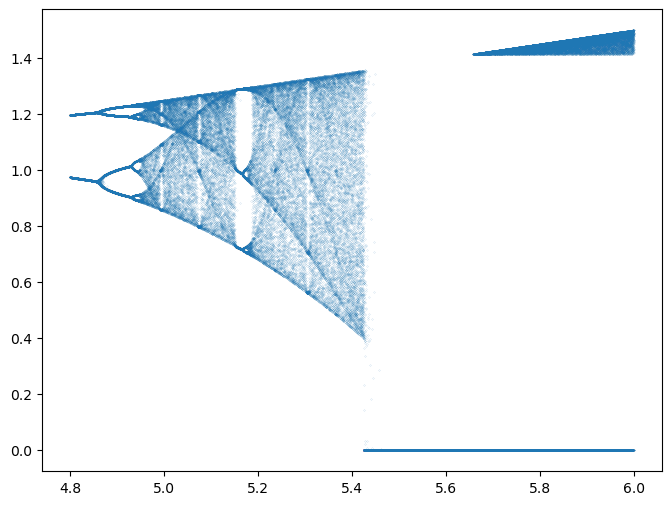

In [15]:
# cosine polynomial 2 terms
def cosPoly2(x): return 1 - x**2/2
LM([4.8, 6.0, .00001, 0, 4, 0.5, 0.5, 100, 16, .005, '#1f77b4', 8, 6], cosPoly2)

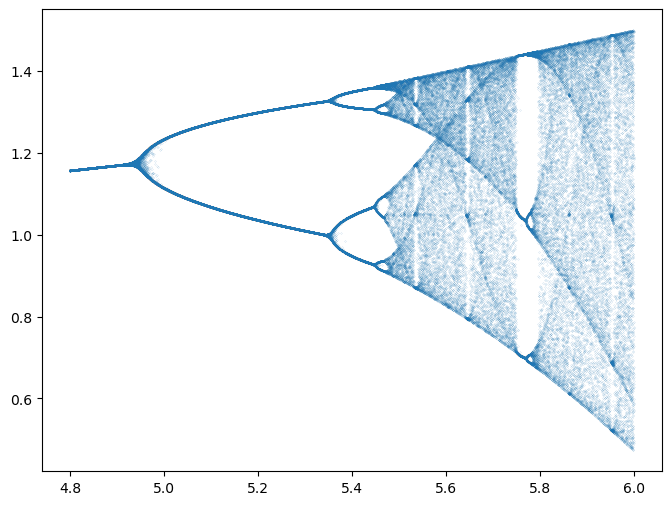

In [16]:
# cosine polynomial 3 terms
def cosPoly3(x): return 1 - x**2/2 + x**4/24
LM([4.8, 6.0, .00001, 0, 4, 0.5, 0.5, 100, 16, .005, '#1f77b4', 8, 6], cosPoly3)

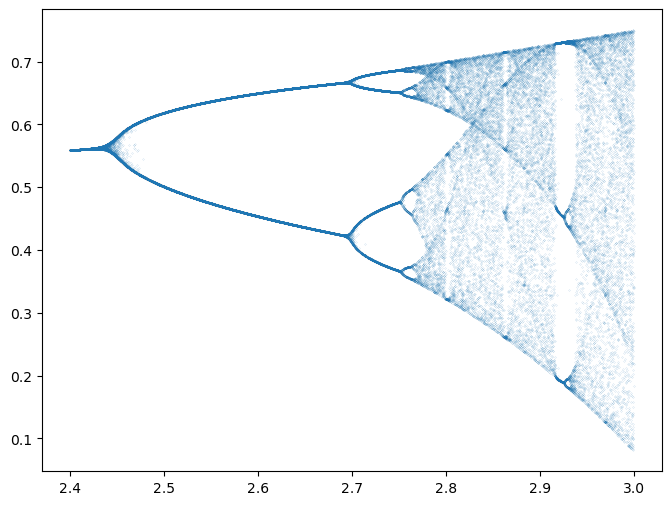

In [17]:
# hyperbolic arctan
LM([2.4, 3.0, .00001, 0, 4, 0.1, 0.5, 100, 16, .005, '#1f77b4', 8, 6], arctanh)

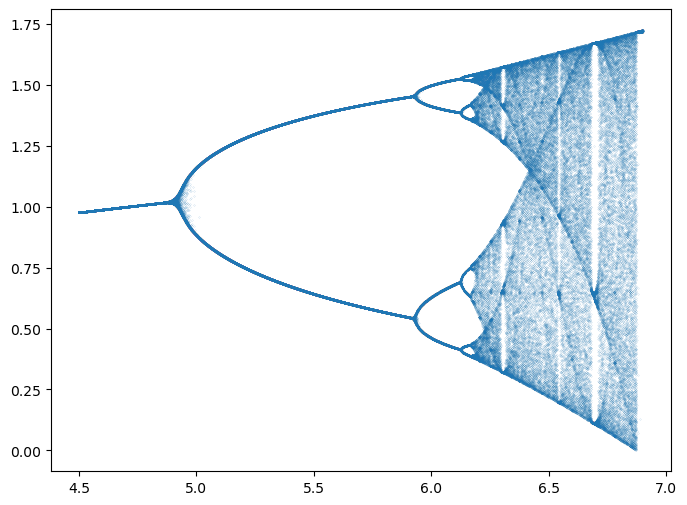

In [18]:
# logarithm(1 + x)
def logOnePlusX(x): return log(1 + x)
LM([4.5, 6.9, .00001, 0, 4, 0.1, 0.5, 200, 16, .005, '#1f77b4', 8, 6], logOnePlusX)

## Mandelbrot on the real line

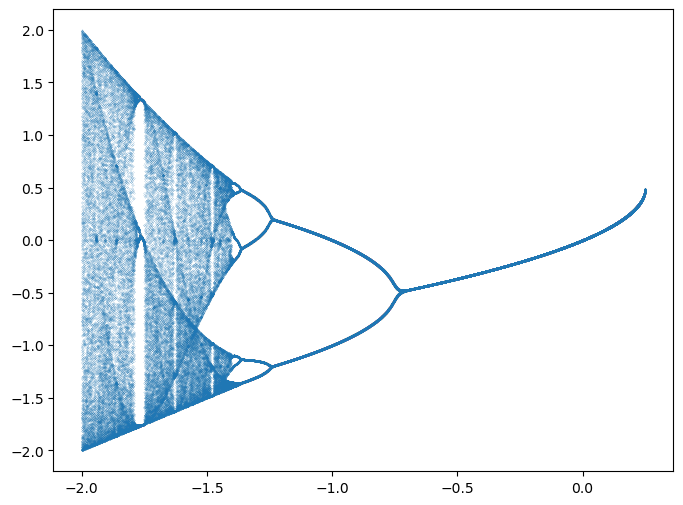

In [19]:
# The Mandelbrot set behaves similarly to the Logistics Map in terms of stable 'orbital' cycling
# Here we isolate from the complex plane only the real line
# The r parameter (multiplier) is replaced by lambda. It is an interesting combination by analogy
#   of multiplier and seed point.

import numpy as np
from matplotlib import pyplot as plt
from random import randint

lamd, xd = [], []
for lam in np.arange(.25, -2., -.00001):
    n = 100 + randint(0, 10)
    x0 = 0.0
    for i in range(n):
        xp = x0**2 + lam
        if abs(xp) > 6: break
        x0 = xp
    lamd.append(lam); xd.append(x0)
    
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(lamd, xd, s=.01, c='#1f77b4')

## Mandelbrot set visuals

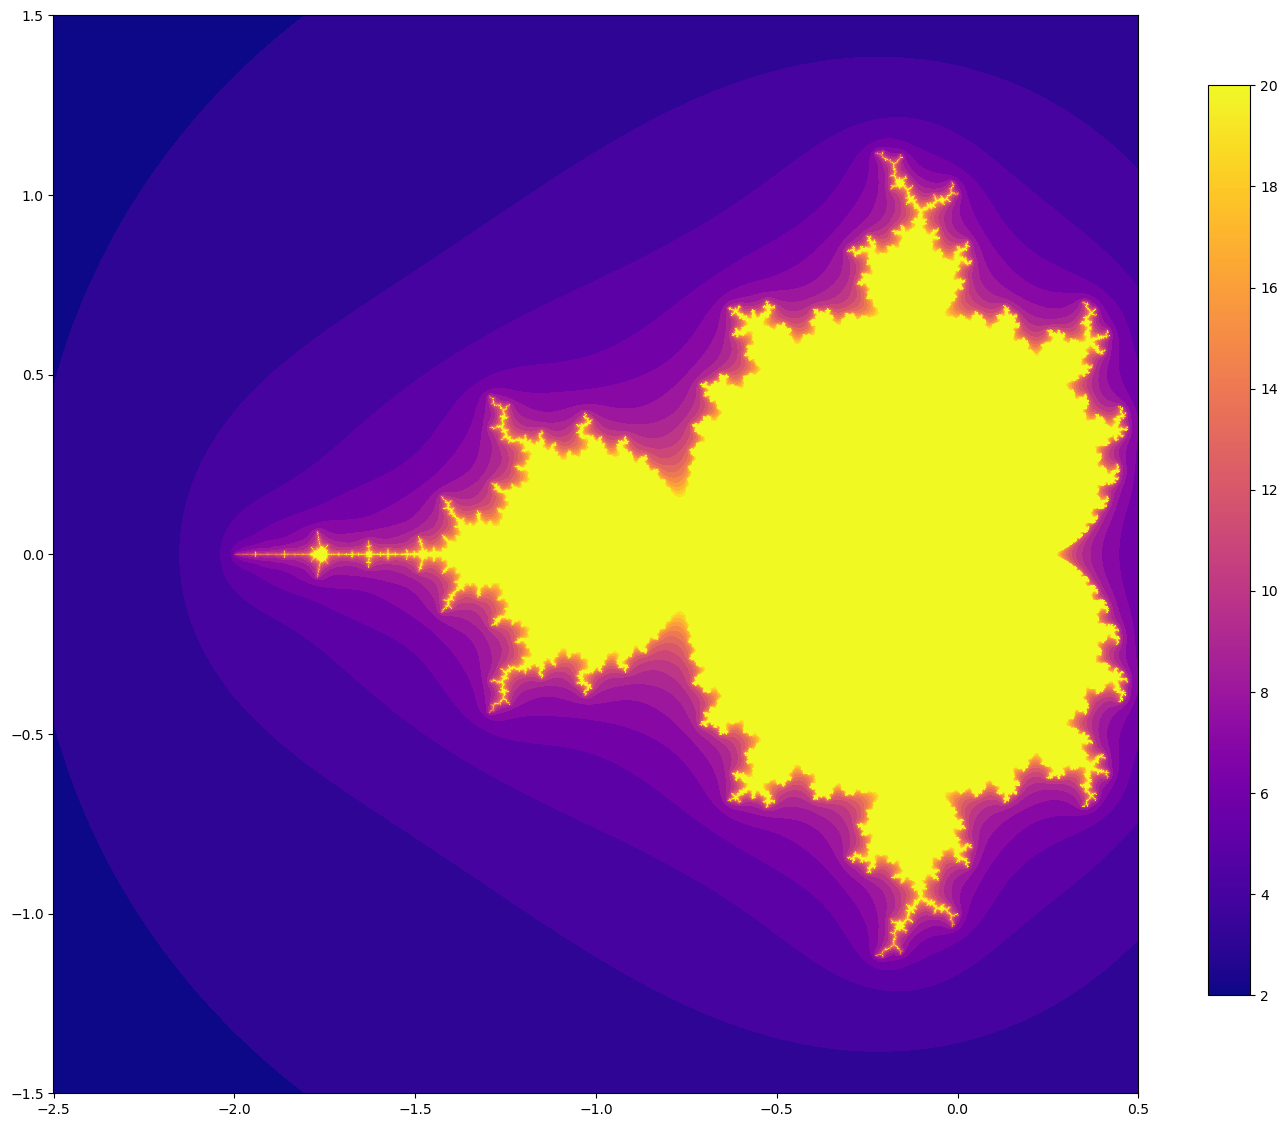

In [20]:
# mandelbrot
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

def z(x, y):
    lambda_x, lambda_y = x, y
    xs, ys, i = 0., 0., 0
    while i < 20:
        i += 1
        if i == 20: break
        xp, yp = xs**2 - ys**2 + lambda_x, 2*xs*ys + lambda_y
        if sqrt(xp**2 + yp**2) > 4: break
        xs, ys = xp, yp
    return i

z2 = np.vectorize(z)

epsilon = .0005
x = np.arange(-2.5, 0.5 + epsilon, epsilon)
y = np.arange(-1.5, 1.5 + epsilon, epsilon)
X, Y = np.meshgrid(x, y)
Z = z2(X, Y)
fig, ax = plt.subplots(figsize=(14,14))

my_cmap = 'plasma'
im=ax.pcolormesh(x, y, Z, cmap=my_cmap)
cax = fig.add_axes([.95, 0.18, .03, .65])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

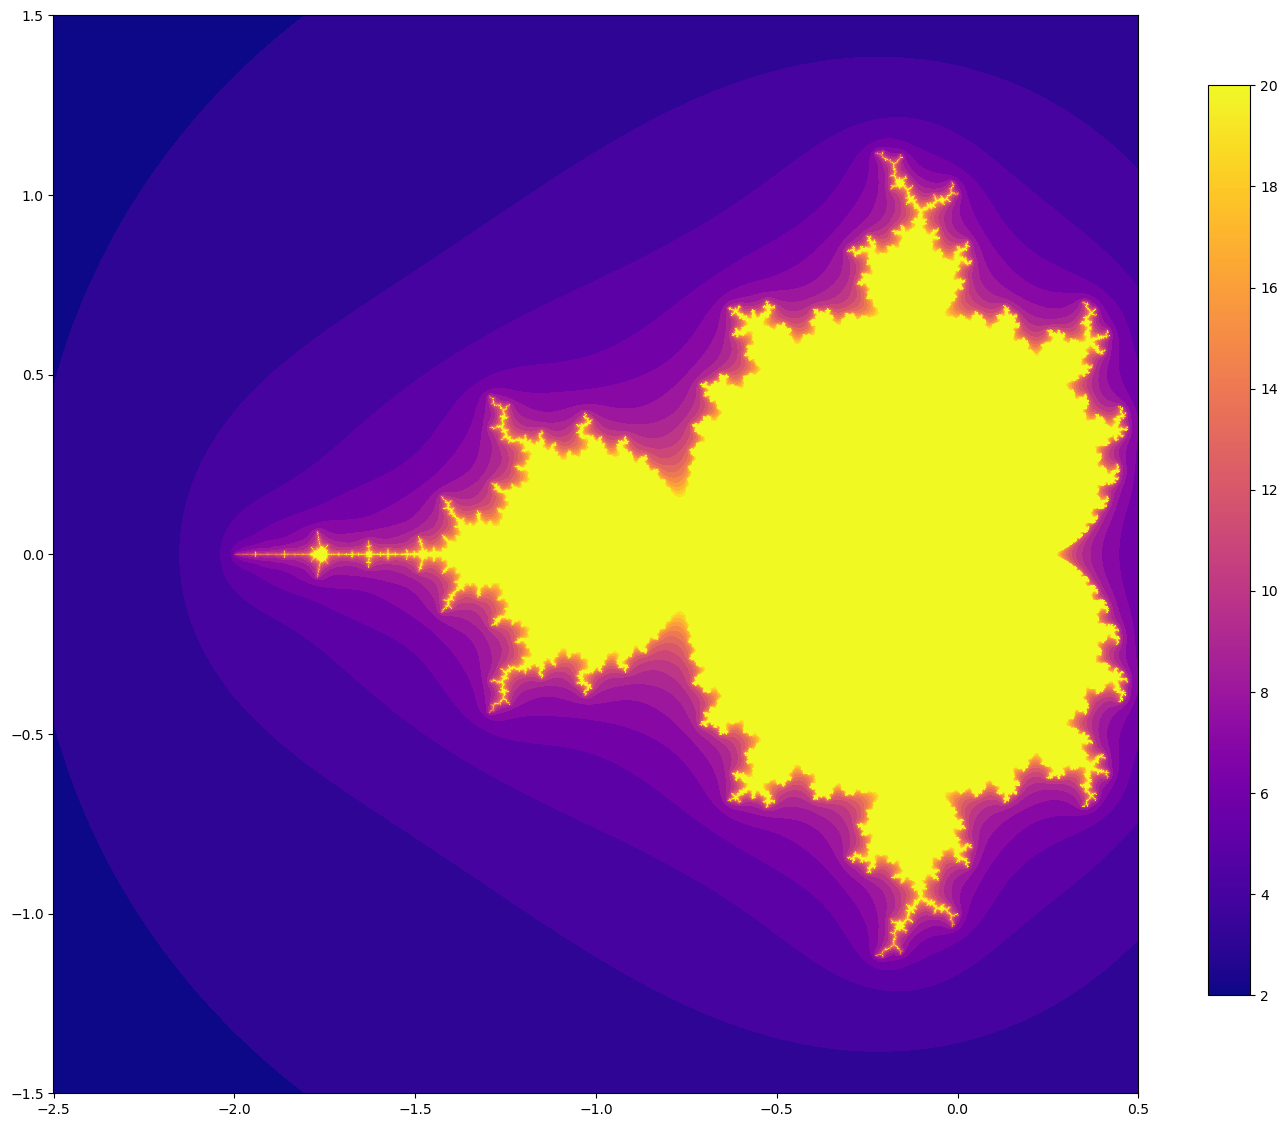

In [21]:
# mandelbrot
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

def z(x, y):
    lambda_x, lambda_y = x, y
    xs, ys, i = 0., 0., 0
    while i < 20:
        i += 1
        if i == 20: break
        xp, yp = xs**2 - ys**2 + lambda_x, 2*xs*ys + lambda_y
        if sqrt(xp**2 + yp**2) > 4: break
        xs, ys = xp, yp
    return i

z2 = np.vectorize(z)

epsilon = .0005
x = np.arange(-2.5, 0.5 + epsilon, epsilon)
y = np.arange(-1.5, 1.5 + epsilon, epsilon)
X, Y = np.meshgrid(x, y)
Z = z2(X, Y)
fig, ax = plt.subplots(figsize=(14,14))

my_cmap = 'plasma'
im=ax.pcolormesh(x, y, Z, cmap=my_cmap)
cax = fig.add_axes([.95, 0.18, .03, .65])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

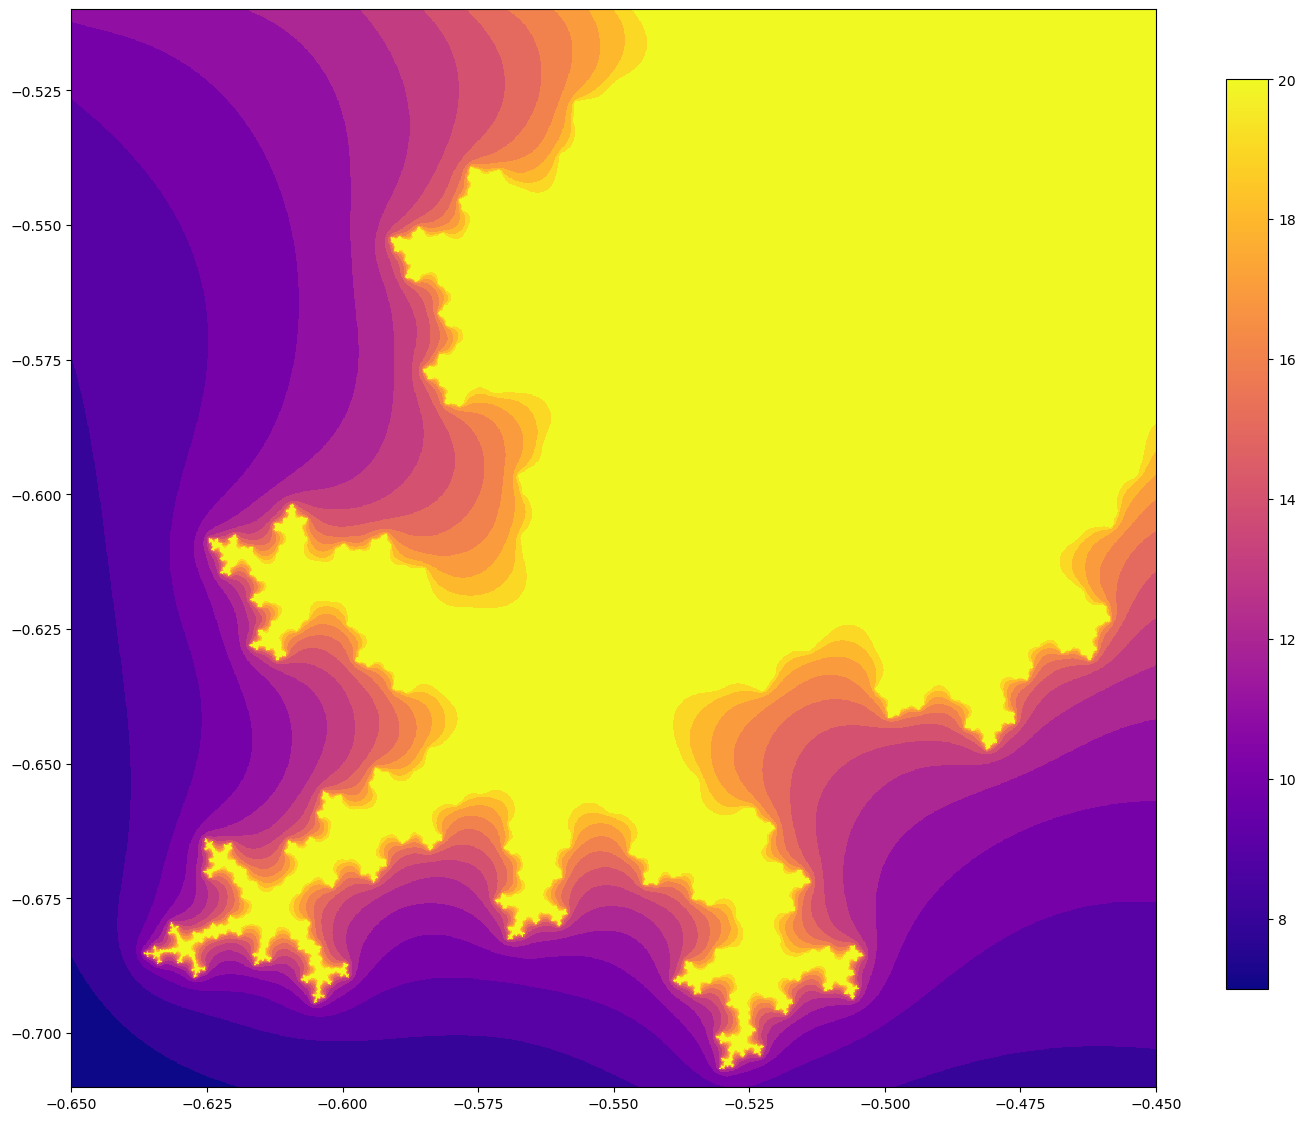

In [22]:
# mandelbrot
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

box_x = -2.1
box_y = -1.5
box_w = 3

box_x = -0.65
box_y = -0.71
box_w = .2

def z(x, y):
    lambda_x, lambda_y = x, y
    xs, ys, i = 0., 0., 0
    while i < 20:
        i += 1
        if i == 20: break
        xp, yp = xs**2 - ys**2 + lambda_x, 2*xs*ys + lambda_y
        if sqrt(xp**2 + yp**2) > 4: break
        xs, ys = xp, yp
    return i

z2 = np.vectorize(z)

# Set up the bounding box and increment
epsilon = box_w / 2000
x = np.arange(box_x, box_x + box_w + epsilon, epsilon)
y = np.arange(box_y, box_y + box_w + epsilon, epsilon)

X, Y = np.meshgrid(x, y)
Z = z2(X, Y)
fig, ax = plt.subplots(figsize=(14,14))

my_cmap = 'plasma'
im=ax.pcolormesh(x, y, Z, cmap=my_cmap)
cax = fig.add_axes([.95, 0.18, .03, .65])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

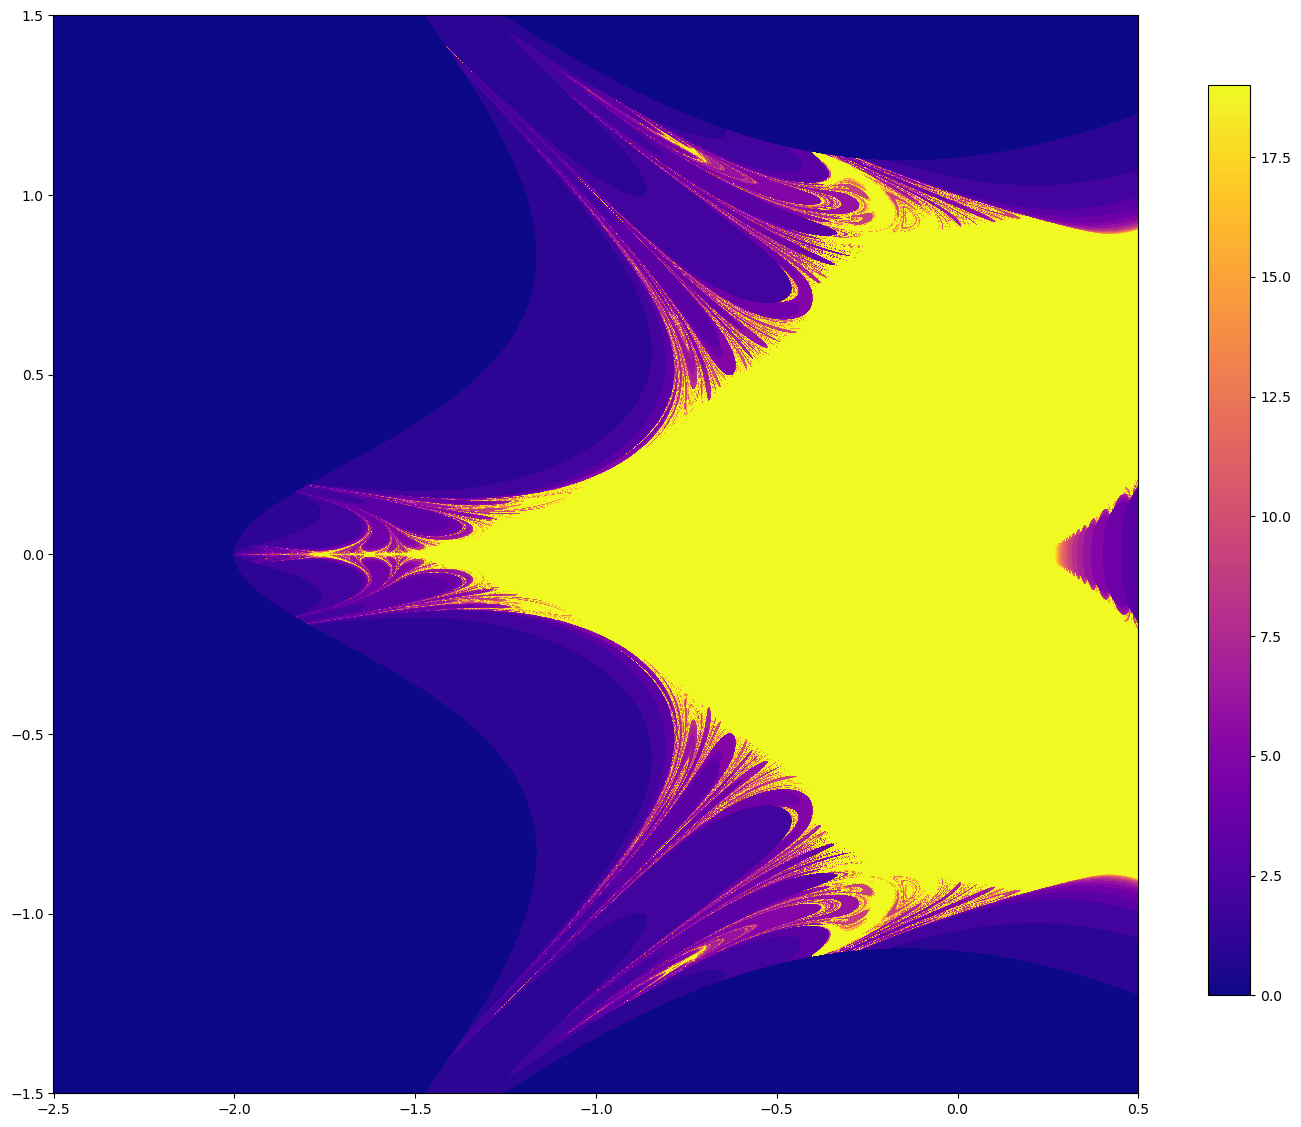

In [13]:
# more ship-like... I wonder what happened here...

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

def z(x, y):
    '''This function calculates a scalar value from a complex number (x, y)'''
    lambda_x, lambda_y = x, y                  # don't use this lambda; but it is important for the Mandelbrot set
    xp, yp = lambda_x, lambda_y
    dist = sqrt(lambda_x**2 + lambda_y**2)
    for i in range(20):
        #xpc= xp left out this line
        xp = (xp**2 - yp**2)
        #yp = 2 * xpc * yp and did the below instead of this
        yp = 2 * xp * yp
        xp += lambda_x
        yp += lambda_y
        dist = sqrt(xp**2 + yp**2)
        if (dist > 2): break
    return i


z2 = np.vectorize(z)

epsilon = .0005
x = np.arange(-2.5, 0.5 + epsilon, epsilon)
y = np.arange(-1.5, 1.5 + epsilon, epsilon)
X, Y = np.meshgrid(x, y)
Z = z2(X, Y)
fig, ax = plt.subplots(figsize=(14,14))

my_cmap = 'plasma'
im=ax.pcolormesh(x, y, Z, cmap=my_cmap)
cax = fig.add_axes([.95, 0.18, .03, .65])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()